In [0]:
!mkdir dataset
!cd dataset
!git init
!git remote add -f origin https://github.com/laiqinghui/Investment-Notebook.git
!git config core.sparseCheckout true
!echo "Stocks/data" >> .git/info/sparse-checkout
!git pull origin master






In [0]:
%matplotlib inline

from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Javascript, display, HTML, Markdown as md
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


pd.set_option('display.float_format', lambda x: '%.3f' % x)

watchlist = [x[x.find("data/")+5:] for x in  glob("./Stocks/data/*")]

# Default
stock = watchlist[0]


##Start by selecting a company

In [44]:
dropdown = widgets.Dropdown(options = watchlist);

def dropdown_eventhandler(change):
    global stock 
    stock = change.new
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.ncells())'))
    
dropdown.observe(dropdown_eventhandler, names='value')

display(dropdown)


Dropdown(options=('Singapore Telecommunications Limited (Z74.SI)', 'ComfortDelGro Corporation Limited (C52.SI)…

## Balance Sheet

In [45]:
# Read data from Morningstar and set metrics as index
income = pd.read_excel("./Stocks/data/" + stock + "/Income Statement_Annual_As Originally Reported.xls",  index_col=0)
balance = pd.read_excel("./Stocks/data/" + stock + "/Balance Sheet_Annual_As Originally Reported.xls",  index_col=0)
balance

,2019,2017,2016,2014,2012
Name,,,,,
Total Assets,"2,408,429,000","2,279,402,000","2,105,706,000","2,019,789,000","2,122,520,000"
Total Current Assets,"710,245,000","856,512,000","829,637,000","724,568,000","831,229,000"
"Cash, Cash Equivalents and Short Term Investments","349,859,000","505,804,000","489,863,000","340,809,000","471,643,000"
Cash and Cash Equivalents,"349,859,000","505,804,000","489,863,000","340,809,000","471,643,000"
Cash,"119,461,000","111,826,000","104,426,000","145,786,000",NaN
...,...,...,...,...,...
Common Shares Issued,0,"1,114,455,720","1,109,002,942","1,118,936,074","1,109,034,510"
Common Shares Outstanding,0,"1,114,455,720","1,109,002,942","1,118,936,074","1,109,034,510"
Common Shares Treasury,0,"114,887,460","90,319,998","30,721,206",0


##Cleaning of data

In [0]:

# Remove whitespaces
balance.index = balance.index.str.strip()
# Transpose df to make metrics as columns
balance = balance.T
# Remove commas and convert str to float for all cols
balance[balance.keys()] = balance[balance.keys()].replace({',': ''}, regex=True).astype(float)/1000000
# Reorder the rows to be ascending downwards
balance = balance.sort_index()

## Balance Sheet Basics

## Assets


Within the **Assets** category, it is split into current assets and non-current assets.

**Current assets** are short-term assets that can be converted to cash within 12 months: 

1) Cash & Cash Equivalents/Marketable securities

 - Low-risk investments such as short-term government bonds or fixed deposits

2) Account Receivables 

 - Sales that you have made but have not collected cash yet. (Paid in credit)

3) Inventories

 - Raw materials that are purchased but have not been sold to the customers yet
 - Connected to the *Cost of Goods Sold* in the income statement.
 - Too little: Can't meet demand, Too much: Incurred opportunity cost
 - Increasing inventory in the balance sheet might means the goods are stuck in the warehouse and no sales are being made
 

Note: *Revenue* in Income Statement is sum of Cash & Cash Equivalents and Account Receivables



**Non-current** assets are long-term assets that can’t be converted to cash within 12 months:

1) Property, Plant & Equipment (PPE)
 
 - Assets that last for 10 or 20 years such as ands, factories, plants, and machineries
 - Linked to the Income Statement by *Depreciation Expense*


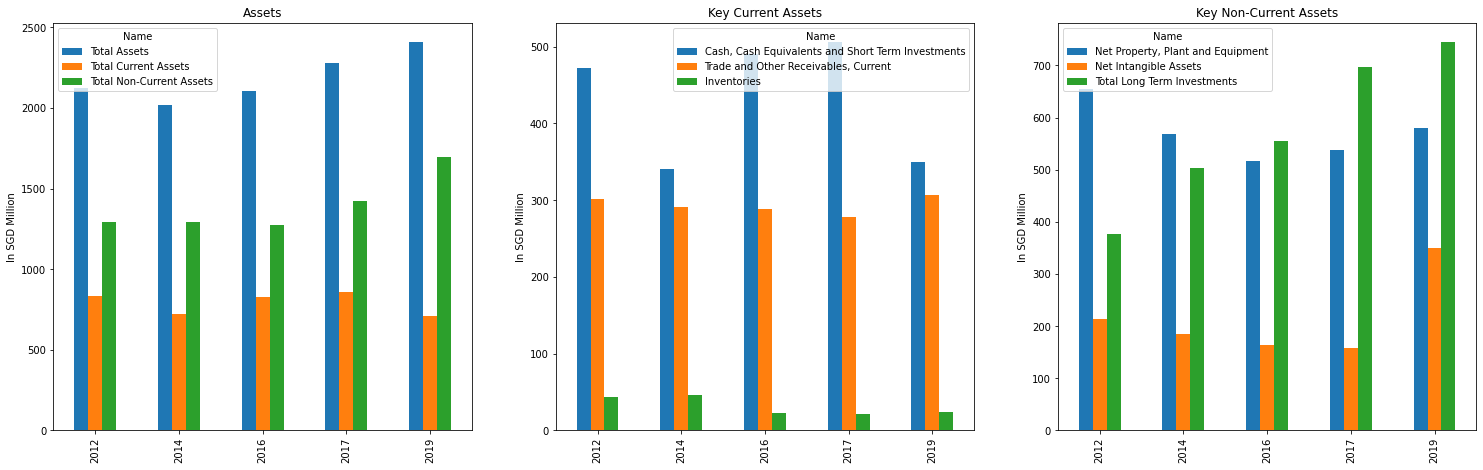

In [47]:
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(25.5, 7.5)

balance[['Total Assets', 'Total Current Assets', 'Total Non-Current Assets']].plot.bar(ax=axs[0])
axs[0].set_title('Assets');
axs[0].set_ylabel("In SGD Million");

balance[['Cash, Cash Equivalents and Short Term Investments', 'Trade and Other Receivables, Current', 'Inventories']].plot.bar(ax=axs[1])
axs[1].set_title('Key Current Assets');
axs[1].set_ylabel("In SGD Million");

nppe = (balance['Net Property, Plant and Equipment']/balance['Total Non-Current Assets'])*100
nia = (balance['Net Intangible Assets']/balance['Total Non-Current Assets'])*100
tlti = (balance['Total Long Term Investments']/balance['Total Non-Current Assets'])*100

balance[['Net Property, Plant and Equipment', 'Net Intangible Assets', 'Total Long Term Investments']].plot.bar(ax=axs[2])
axs[2].set_title('Key Non-Current Assets');
axs[2].set_ylabel("In SGD Million");